In [35]:
# @title
!pip install requests pandas matplotlib


In [36]:
import yfinance as yf
import pandas as pd

ticker = "ASML.AS"
df = yf.download(ticker, period="12mo")

df.tail()

/tmp/ipython-input-1133429718.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="12mo")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ASML.AS,ASML.AS,ASML.AS,ASML.AS,ASML.AS
Date,,,,,
2026-02-04,1139.071289,1196.394383,1137.872946,1189.603448,665068
2026-02-05,1148.059204,1169.830035,1116.102093,1140.669098,724517
2026-02-06,1192.200073,1192.200073,1135.476150,1140.868937,545398
2026-02-09,1204.800049,1205.000000,1177.400024,1200.000000,456425
2026-02-10,1193.000000,1212.400024,1185.800049,1196.000000,459476


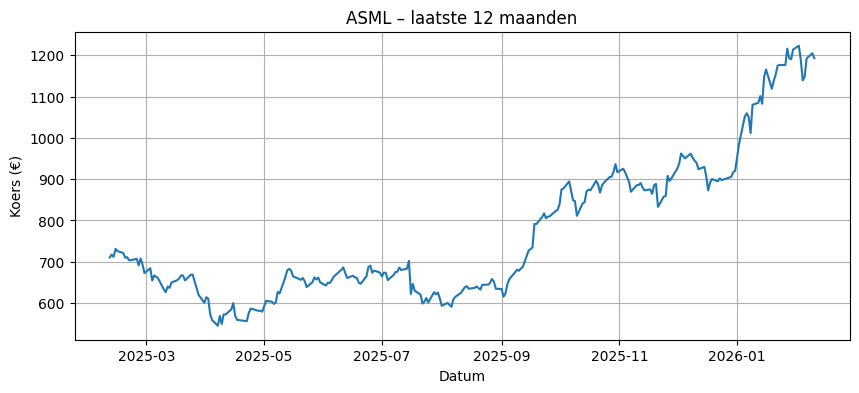

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Close"])
plt.title("ASML – laatste 12 maanden")
plt.xlabel("Datum")
plt.ylabel("Koers (€)")
plt.grid(True)
plt.show()


In [38]:
tickers = {
    "Alfen": "ALFEN.AS",
    "Ebusco": "EBUS.AS",
    "Fastned": "FAST.AS",
    "Heijmans": "HEIJM.AS",
    "BAM": "BAMNB.AS",
    "ASML": "ASML.AS"
}
import yfinance as yf
import matplotlib.pyplot as plt

data = {}

for naam, ticker in tickers.items():
    df = yf.download(ticker, period="12mo")
    data[naam] = df

/tmp/ipython-input-1516105811.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="12mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1516105811.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="12mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1516105811.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="12mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1516105811.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="12mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1516105811.py:15: FutureWarning: YF.download() has changed argument auto_adju

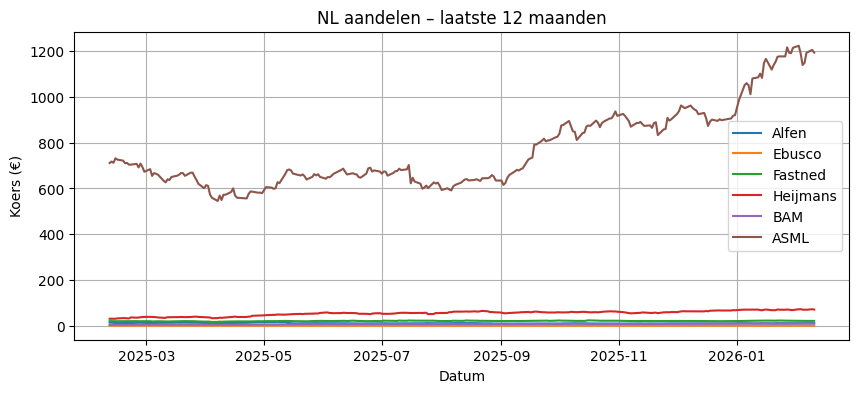

In [39]:
plt.figure(figsize=(10,4))

for naam, df in data.items():
    plt.plot(df.index, df["Close"], label=naam)

plt.title("NL aandelen – laatste 12 maanden")
plt.xlabel("Datum")
plt.ylabel("Koers (€)")
plt.legend()
plt.grid(True)
plt.show()


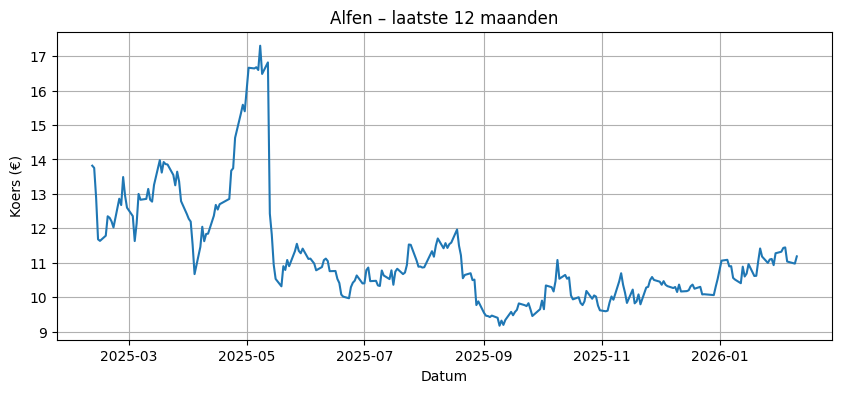

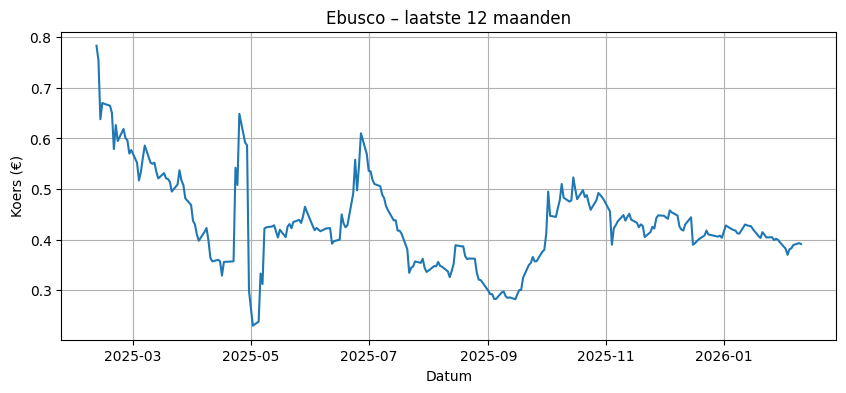

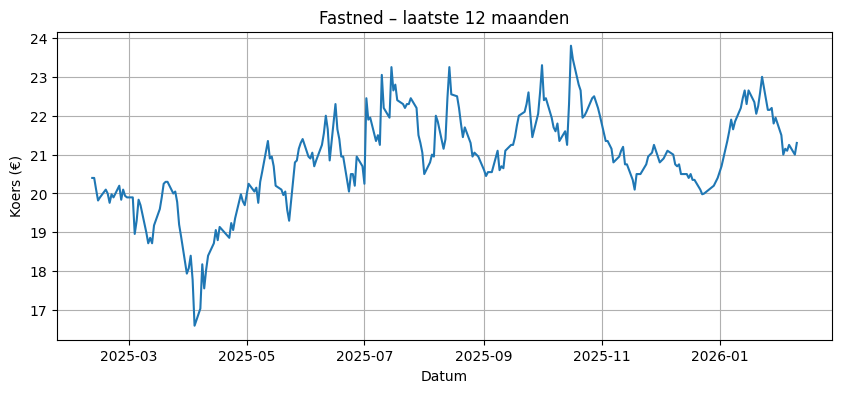

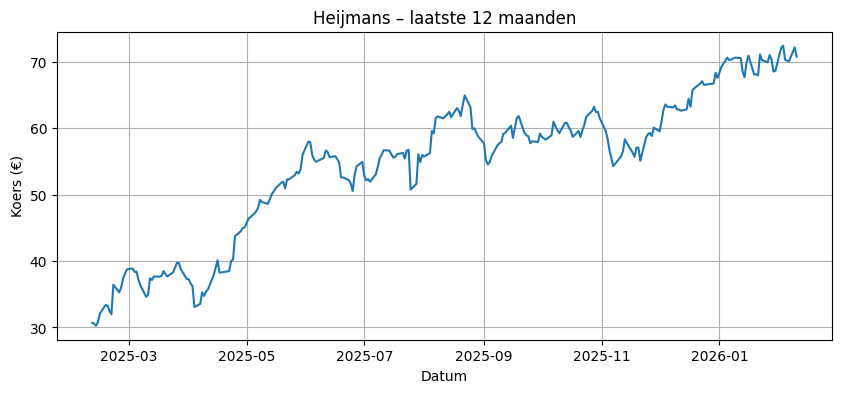

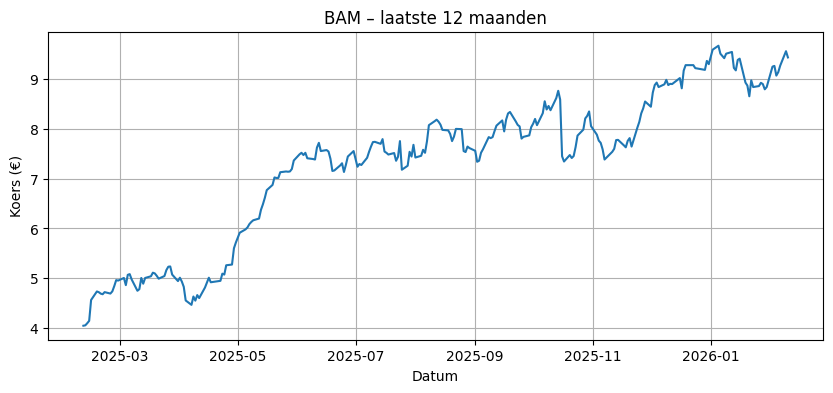

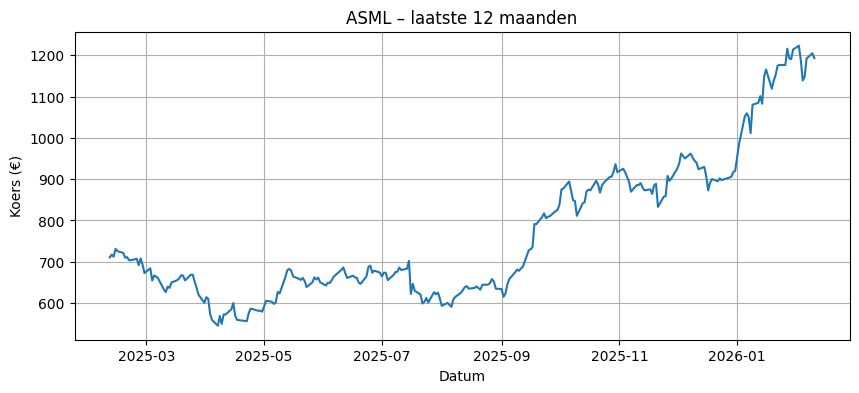

In [40]:
for naam, df in data.items():
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df["Close"])
    plt.title(f"{naam} – laatste 12 maanden")
    plt.xlabel("Datum")
    plt.ylabel("Koers (€)")
    plt.grid(True)
    plt.show()


In [41]:
returns = {}

for naam, df in data.items():
    start = df["Close"].iloc[0]
    end = df["Close"].iloc[-1]
    returns[naam] = (end / start - 1) * 100

returns


{'Alfen': Ticker
 ALFEN.AS   -19.066565
 dtype: float64,
 'Ebusco': Ticker
 EBUS.AS   -50.019154
 dtype: float64,
 'Fastned': Ticker
 FAST.AS    4.411763
 dtype: float64,
 'Heijmans': Ticker
 HEIJM.AS    130.73877
 dtype: float64,
 'BAM': Ticker
 BAMNB.AS    133.086511
 dtype: float64,
 'ASML': Ticker
 ASML.AS    67.869775
 dtype: float64}

In [42]:
import numpy as np

volatility = {}

for naam, df in data.items():
    daily_returns = df["Close"].pct_change()
    volatility[naam] = daily_returns.std() * np.sqrt(252) * 100

volatility


{'Alfen': Ticker
 ALFEN.AS    51.742623
 dtype: float64,
 'Ebusco': Ticker
 EBUS.AS    118.964072
 dtype: float64,
 'Fastned': Ticker
 FAST.AS    35.106182
 dtype: float64,
 'Heijmans': Ticker
 HEIJM.AS    39.900836
 dtype: float64,
 'BAM': Ticker
 BAMNB.AS    35.829192
 dtype: float64,
 'ASML': Ticker
 ASML.AS    37.208735
 dtype: float64}

In [43]:
import pandas as pd

# Extract scalar values from the Series in returns and volatility dictionaries
returns_cleaned = {name: r.values[0] for name, r in returns.items()}
volatility_cleaned = {name: v.values[0] for name, v in volatility.items()}

summary = pd.DataFrame({
    "Rendement (%)": returns_cleaned,
    "Volatiliteit (%)": volatility_cleaned
})

summary.sort_values("Rendement (%)", ascending=False)

,Rendement (%),Volatiliteit (%)
BAM,133.086511,35.829192
Heijmans,130.738770,39.900836
ASML,67.869775,37.208735
Fastned,4.411763,35.106182
Alfen,-19.066565,51.742623
Ebusco,-50.019154,118.964072


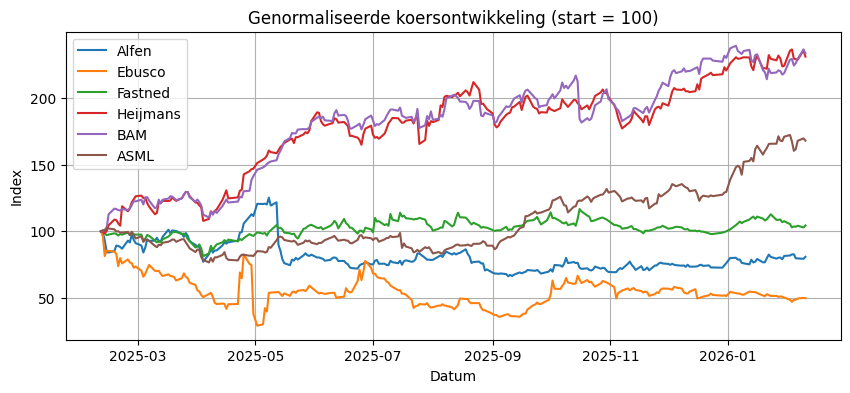

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

for naam, df in data.items():
    normalized = df["Close"] / df["Close"].iloc[0] * 100
    plt.plot(df.index, normalized, label=naam)

plt.title("Genormaliseerde koersontwikkeling (start = 100)")
plt.xlabel("Datum")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.show()


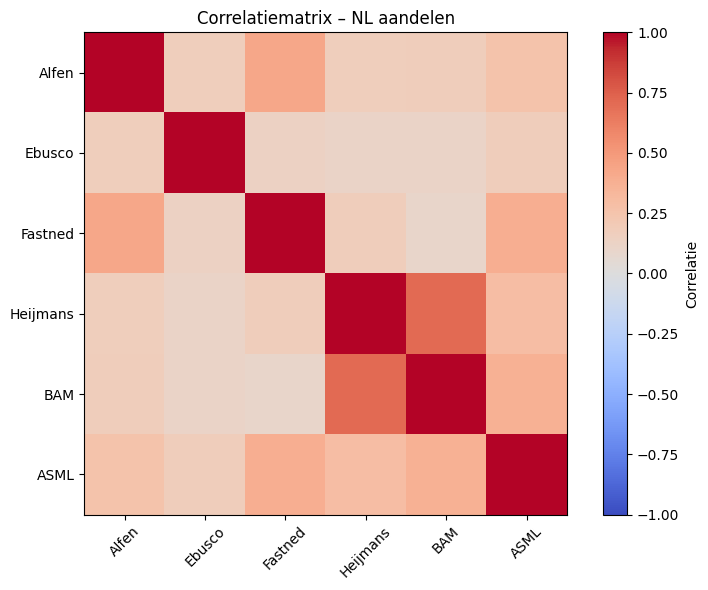

In [48]:
import pandas as pd

returns_df = pd.DataFrame()

for naam, df in data.items():
    returns_df[naam] = df["Close"].pct_change()

returns_df = returns_df.dropna()
returns_df.head()

corr_matrix = returns_df.corr()
corr_matrix

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlatie")

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlatiematrix – NL aandelen")
plt.tight_layout()
plt.show()



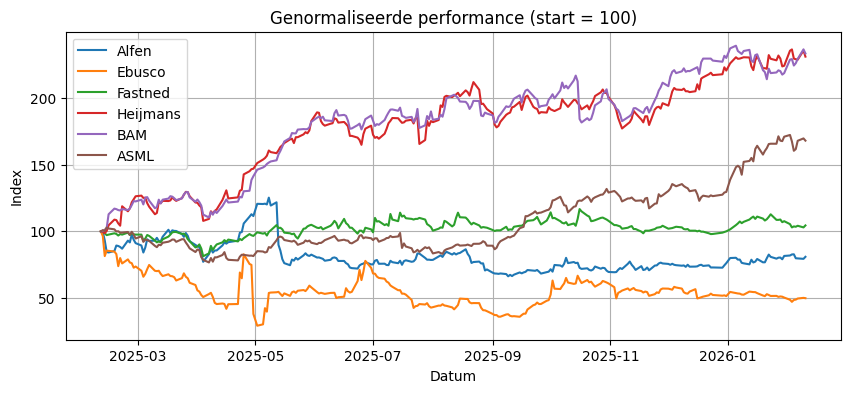

In [50]:
summary

plt.figure(figsize=(10,4))

for naam, df in data.items():
    norm = df["Close"] / df["Close"].iloc[0] * 100
    plt.plot(df.index, norm, label=naam)

plt.title("Genormaliseerde performance (start = 100)")
plt.xlabel("Datum")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.show()



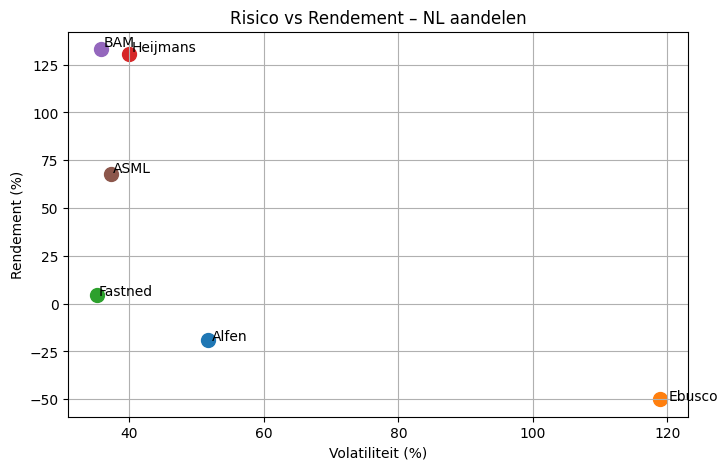

In [51]:
plt.figure(figsize=(8,5))

for naam in summary.index:
    plt.scatter(
        summary.loc[naam, "Volatiliteit (%)"],
        summary.loc[naam, "Rendement (%)"],
        s=100
    )
    plt.text(
        summary.loc[naam, "Volatiliteit (%)"] * 1.01,
        summary.loc[naam, "Rendement (%)"] * 1.01,
        naam
    )

plt.xlabel("Volatiliteit (%)")
plt.ylabel("Rendement (%)")
plt.title("Risico vs Rendement – NL aandelen")
plt.grid(True)
plt.show()


In [54]:
import os

os.makedirs("data", exist_ok=True)

for naam, df in data.items():
    df.to_csv(f"data/{naam}_prices.csv")

summary.to_csv("data/summary_metrics.csv")


“Returns and volatility are calculated using daily returns, annualised assuming 252 trading days.”

# Nederlandse aandelen analyse (Python)

Dit project analyseert koersdata van Nederlandse aandelen
(Alfen, Ebusco, Fastned, Heijmans, BAM) met Python en Yahoo Finance.

## Gebruikte tools
- Python
- pandas
- yfinance
- matplotlib

## Stappen
1. Data ophalen via Yahoo Finance
2. Koersvisualisatie
3. Rendement en risico-analyse



## Correlatie-analyse

De correlatiematrix toont duidelijke sectorpatronen.
BAM en Heijmans vertonen een sterke positieve correlatie,
wat consistent is met hun vergelijkbare blootstelling aan de bouw- en infrastructuurcyclus.

Energie- en mobiliteitsaandelen zoals Alfen en Fastned tonen een matige correlatie,
wat wijst op gedeeltelijk overlappende maar niet identieke marktdynamiek.

ASML vertoont een meer onafhankelijke beweging ten opzichte van de overige aandelen,
wat duidt op andere onderliggende economische factoren.

Deze verschillen in correlatie zijn relevant voor risicospreiding en portfolio-opbouw.
